In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Input,Flatten
from tensorflow.keras.models import Model

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0 
x_train.shape

(60000, 28, 28)

In [5]:
x_train = np.expand_dims(x_train,-1)
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_train[0].shape

(28, 28, 1)

In [7]:
k = len(set(y_train))

i = Input(x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4890 - accuracy: 0.8190 - val_loss: 0.3930 - val_accuracy: 0.8533
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3347 - accuracy: 0.8738 - val_loss: 0.3352 - val_accuracy: 0.8758
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2821 - accuracy: 0.8931 - val_loss: 0.3167 - val_accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2462 - accuracy: 0.9074 - val_loss: 0.3039 - val_accuracy: 0.8901
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2132 - accuracy: 0.9190 - val_loss: 0.3000 - val_accuracy: 0.8949


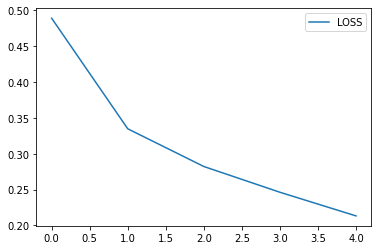

In [9]:
plt.plot(r.history['loss'],label='LOSS')
plt.legend()

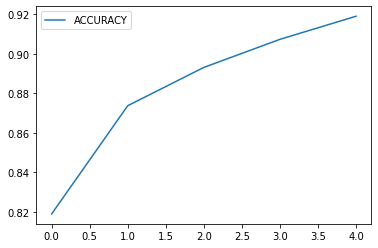

In [10]:
plt.plot(r.history['accuracy'],label='ACCURACY')
plt.legend()

In [11]:
acc = model.evaluate(x_test,y_test)
print('Accuracy: ',acc[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3000 - accuracy: 0.8949
Accuracy:  0.8949000239372253


In [15]:
import keras.utils as image
# img = image.img_to_array(image.load_img(image_path, target_size=(224, 224))) / 255.""

TypeError: img_to_array() missing 1 required positional argument: 'img'